In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import seaborn as sns
import datetime as dt

In [3]:
stocks = ["AAPL","MSFT","NVDA","AMZN"]
weights = np.array([0.25,0.25,0.25,0.25])

if not np.isclose(weights.sum(),1):
    raise ValueError("Los pesos deben sumar 1")

end = dt.datetime.now()
start = end - dt.timedelta(days=365*3)

In [5]:
prices = yf.download(stocks,start=start,end=end,progress=False)["Close"]
returns = prices.pct_change().dropna()
prices.head()

/tmp/ipython-input-4275975823.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  prices = yf.download(stocks,start=start,end=end,progress=False)["Close"]


Ticker,AAPL,AMZN,MSFT,NVDA
Date,,,,
2023-02-21,146.359665,94.580002,247.388062,20.634344
2023-02-22,146.783508,95.790001,246.252319,20.733242
2023-02-23,147.266525,95.820000,249.444183,23.640335
2023-02-24,144.614960,93.500000,244.010193,23.262711
2023-02-27,145.807663,93.760002,244.930542,23.477497


In [6]:
mean_returns = returns.mean()
cov_matrix = returns.cov()

print("Media diaria retornos:")
print(mean_returns)
print("\\nMatriz de covarianza:")
print(cov_matrix)

Media diaria retornos:
Ticker
AAPL    0.000917
AMZN    0.001201
MSFT    0.000741
NVDA    0.003407
dtype: float64
\nMatriz de covarianza:
Ticker      AAPL      AMZN      MSFT      NVDA
Ticker                                        
AAPL    0.000263  0.000144  0.000106  0.000179
AMZN    0.000144  0.000387  0.000167  0.000272
MSFT    0.000106  0.000167  0.000221  0.000237
NVDA    0.000179  0.000272  0.000237  0.000967


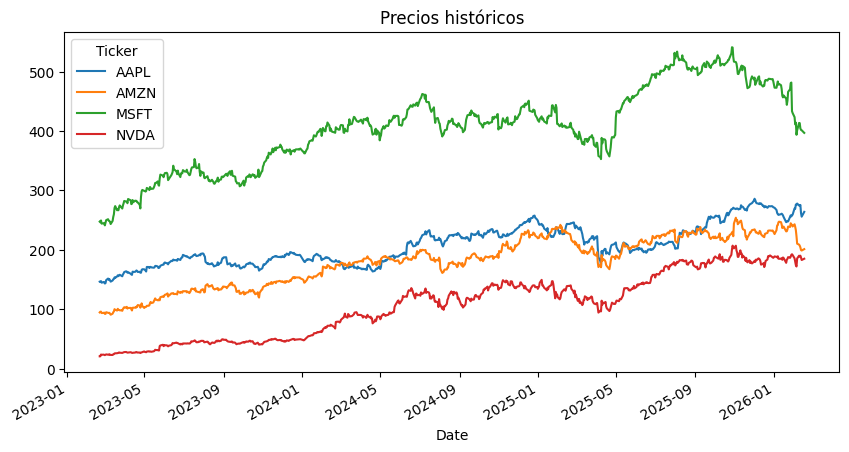

In [7]:
prices.plot(figsize=(10,5),title="Precios históricos")
plt.show()

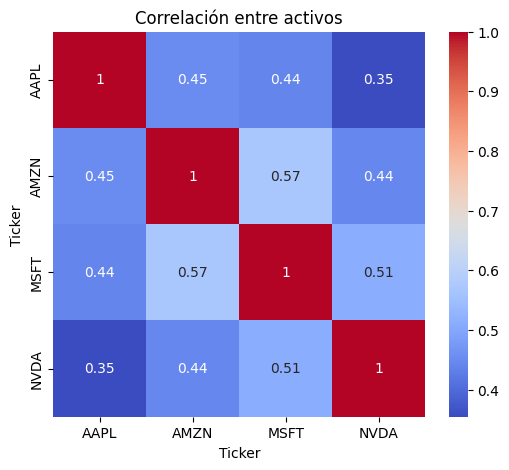

In [9]:
plt.figure(figsize=(6,5))
sns.heatmap(returns.corr(),annot=True,cmap="coolwarm")
plt.title("Correlación entre activos")
plt.show()

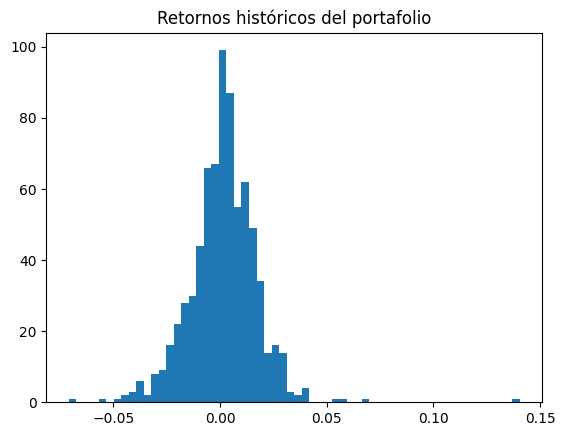

Volatilidad histórica diaria: 0.015898399150154473


In [8]:
portfolio_hist = returns.dot(weights)

plt.hist(portfolio_hist,bins=60)
plt.title("Retornos históricos del portafolio")
plt.show()

print("Volatilidad histórica diaria:", portfolio_hist.std())

## Simulación Montrecarlo del portafolio

In [11]:
num_sim = 5000
num_days = 252
k = len(stocks)

L = np.linalg.cholesky(cov_matrix)
portfolio_paths = np.zeros((num_days,num_sim))

In [12]:
for m in range(num_sim):

    Z = np.random.normal(size=(num_days,k))
    correlated = Z @ L.T
    daily_returns = correlated + mean_returns.values
    port_daily = daily_returns @ weights
    portfolio_paths[:,m] = np.cumprod(1+port_daily)

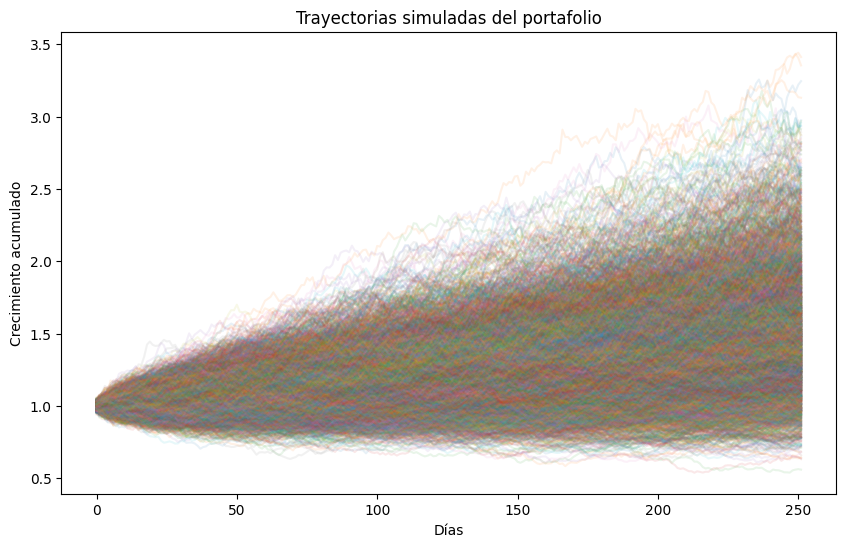

In [14]:
plt.figure(figsize=(10,6))
plt.plot(portfolio_paths,alpha=0.1)
plt.title("Trayectorias simuladas del portafolio")
plt.xlabel("Días")
plt.ylabel("Crecimiento acumulado")
plt.show()

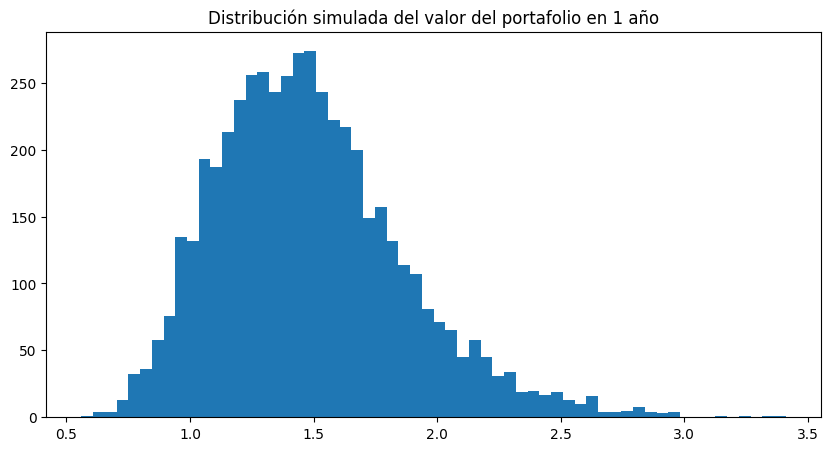

Valor esperado final: 1.4844587999135255
Probabilidad de pérdida: 0.0778


In [15]:
final_values = portfolio_paths[-1]

plt.figure(figsize=(10,5))
plt.hist(final_values,bins=60)
plt.title("Distribución simulada del valor del portafolio en 1 año")
plt.show()

print("Valor esperado final:", final_values.mean())
print("Probabilidad de pérdida:", np.mean(final_values<1))

In [19]:
stocks = ["COST","V","AAPL","GOOGL"]
weights = np.array([0.35,0.35,0.20,0.10])

if not np.isclose(weights.sum(),1):
    raise ValueError("Los pesos deben sumar 1")

end = dt.datetime.now()
start = end - dt.timedelta(days=365*3)

In [20]:
prices = yf.download(stocks,start=start,end=end,progress=False)["Close"]
returns = prices.pct_change().dropna()
prices.head()

/tmp/ipython-input-4275975823.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  prices = yf.download(stocks,start=start,end=end,progress=False)["Close"]


Ticker,AAPL,COST,GOOGL,V
Date,,,,
2023-02-21,146.359650,481.737091,91.101669,215.667221
2023-02-22,146.783539,477.560608,90.962715,215.080734
2023-02-23,147.266556,473.479980,90.208412,216.165787
2023-02-24,144.614975,469.130554,88.461594,214.621292
2023-02-27,145.807663,467.613556,89.196060,215.403305


In [21]:
mean_returns = returns.mean()
cov_matrix = returns.cov()

print("Media diaria retornos:")
print(mean_returns)
print("\\nMatriz de covarianza:")
print(cov_matrix)

Media diaria retornos:
Ticker
AAPL     0.000917
COST     0.001068
GOOGL    0.001769
V        0.000596
dtype: float64
\nMatriz de covarianza:
Ticker      AAPL      COST     GOOGL         V
Ticker                                        
AAPL    0.000263  0.000062  0.000131  0.000078
COST    0.000062  0.000153  0.000042  0.000054
GOOGL   0.000131  0.000042  0.000336  0.000057
V       0.000078  0.000054  0.000057  0.000143


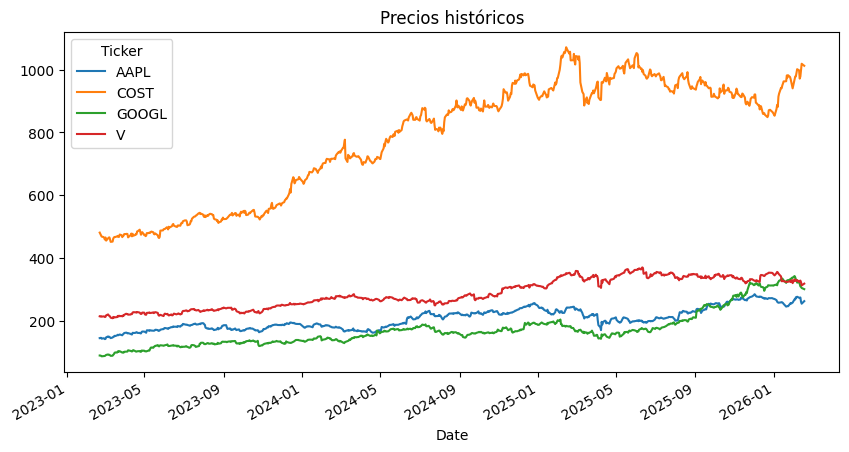

In [22]:
prices.plot(figsize=(10,5),title="Precios históricos")
plt.show()

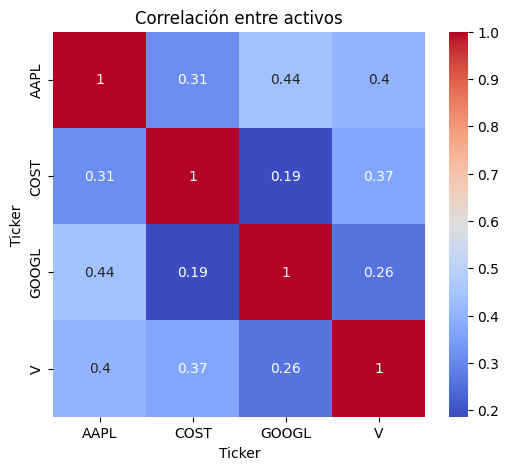

In [23]:
plt.figure(figsize=(6,5))
sns.heatmap(returns.corr(),annot=True,cmap="coolwarm")
plt.title("Correlación entre activos")
plt.show()

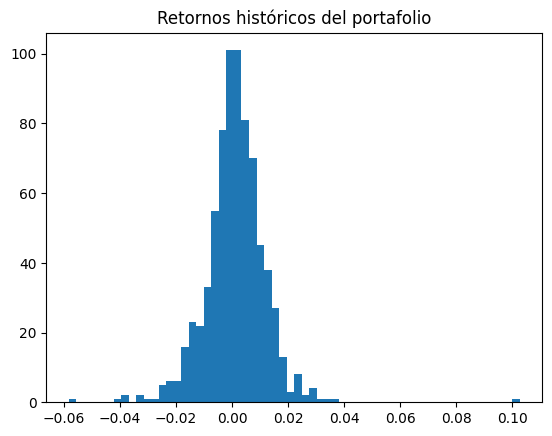

Volatilidad histórica diaria: 0.010807491250666443


In [24]:
portfolio_hist = returns.dot(weights)

plt.hist(portfolio_hist,bins=60)
plt.title("Retornos históricos del portafolio")
plt.show()

print("Volatilidad histórica diaria:", portfolio_hist.std())

In [25]:
num_sim = 5000
num_days = 252
k = len(stocks)

L = np.linalg.cholesky(cov_matrix)
portfolio_paths = np.zeros((num_days,num_sim))

In [26]:
for m in range(num_sim):

    Z = np.random.normal(size=(num_days,k))
    correlated = Z @ L.T
    daily_returns = correlated + mean_returns.values
    port_daily = daily_returns @ weights
    portfolio_paths[:,m] = np.cumprod(1+port_daily)

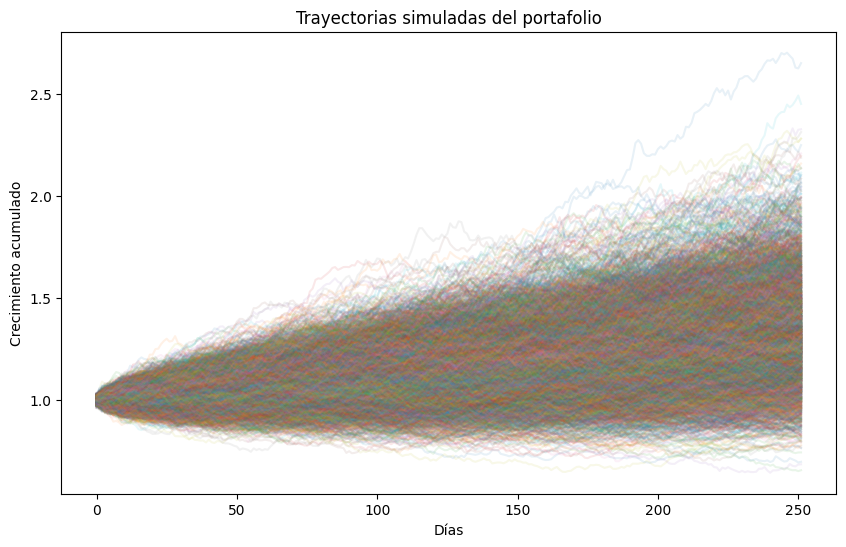

In [27]:
plt.figure(figsize=(10,6))
plt.plot(portfolio_paths,alpha=0.1)
plt.title("Trayectorias simuladas del portafolio")
plt.xlabel("Días")
plt.ylabel("Crecimiento acumulado")
plt.show()

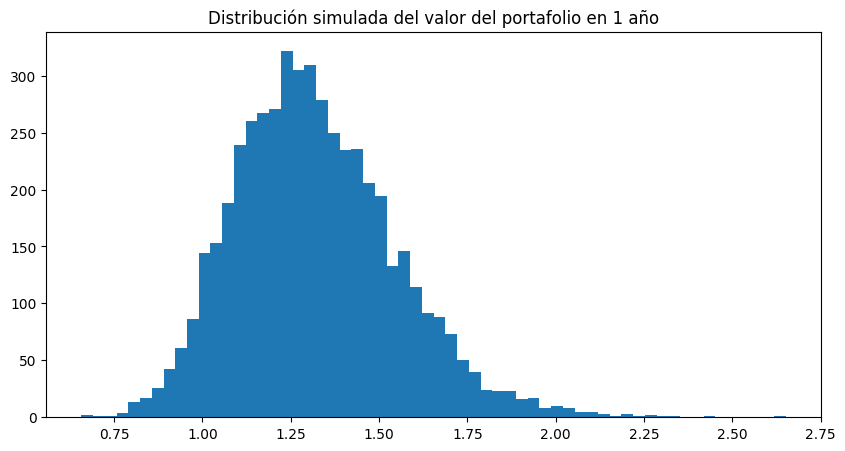

Valor esperado final: 1.3204167903730892
Probabilidad de pérdida: 0.0592


In [28]:
final_values = portfolio_paths[-1]

plt.figure(figsize=(10,5))
plt.hist(final_values,bins=60)
plt.title("Distribución simulada del valor del portafolio en 1 año")
plt.show()

print("Valor esperado final:", final_values.mean())
print("Probabilidad de pérdida:", np.mean(final_values<1))

# Preguntas

¿Qué activos están más correlacionados?

Apple y Google

¿El portafolio parece estable o muy variable?

El portafolio parece un poco variable pero con buen rendimiento

¿Cuál activo parece dominar el comportamiento del portafolio?

apple

¿Las trayectorias simuladas son similares entre sí o muy distintas?

Similares entre si

¿La dispersión aumenta con el tiempo?

Si

¿Qué observas en la distribución final del portafolio?

Que es un buen portafolio pero algo variable justo
